# Imports & Data Read

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%capture
!unzip "/content/drive/MyDrive/Edu/CV/ProjectData/train_test_dataset.zip" -d "data"

In [4]:
import glob
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.utils as utils
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [5]:
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

/device:GPU:0
Num GPUs Available:  1


In [6]:
train_path = "/content/data/train_test_dataset/train"
test_path =  "/content/data/train_test_dataset/test"

In [7]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
COLOR_MODE = "grayscale"
VALIDATION_SPLIT = 0.2
SPLIT_SEED = 42
COLOR_CHANNELS = 3 if COLOR_MODE == 'rgb' else 1

In [8]:
print("Train data:")
train_data = utils.image_dataset_from_directory(train_path,subset='training',
                                                validation_split=VALIDATION_SPLIT, 
                                                seed = SPLIT_SEED, 
                                                image_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE,
                                                color_mode=COLOR_MODE)

print('-' * 10)
print("Validataion data:")
valid = utils.image_dataset_from_directory(train_path,subset='validation',
                                           validation_split=VALIDATION_SPLIT, 
                                           seed = SPLIT_SEED,
                                           image_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE,
                                           color_mode=COLOR_MODE) 
print('-' * 10)
print("Complete data:")
complete_data = utils.image_dataset_from_directory(train_path, 
                                                   image_size=IMG_SIZE,
                                                   batch_size=BATCH_SIZE,
                                                   color_mode=COLOR_MODE)

Train data:
Found 200 files belonging to 5 classes.
Using 160 files for training.
----------
Validataion data:
Found 200 files belonging to 5 classes.
Using 40 files for validation.
----------
Complete data:
Found 200 files belonging to 5 classes.


In [9]:
print("Test data:")
test_data = utils.image_dataset_from_directory(test_path,
                                               seed = 42, 
                                               image_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE, 
                                               color_mode=COLOR_MODE)
print('-' * 10)

Test data:
Found 40 files belonging to 5 classes.
----------


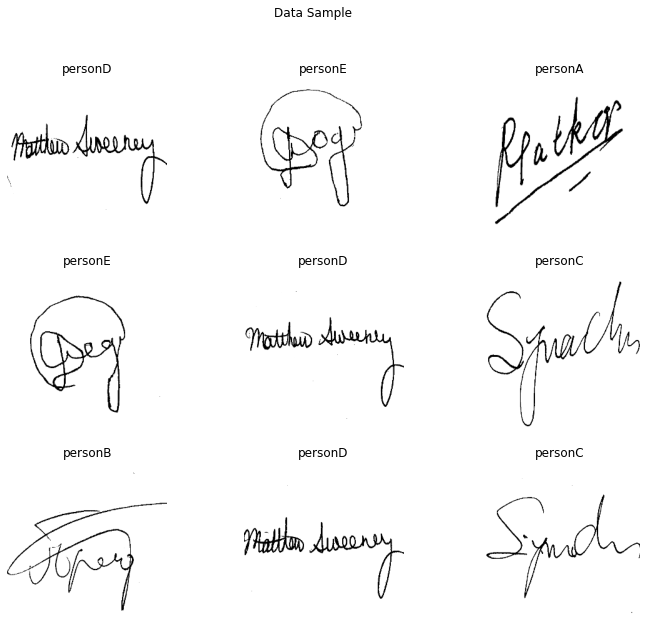

In [10]:
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Data Sample")
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().squeeze().astype("uint8"), cmap='gray')
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")

# Models

## CNN 1

In [20]:
model = keras.Sequential()
model.add(keras.layers.Rescaling(1 / 255.0, input_shape=(*IMG_SIZE, 1)))
model.add(keras.layers.Conv2D(8, (10,10), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(16, (5,5), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32, (3,3), activation=keras.activations.relu))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, keras.activations.relu))
model.add(keras.layers.Dense(5, keras.activations.softmax))

In [21]:
model.compile(keras.optimizers.Adam(),
              loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 247, 247, 8)       808       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 119, 119, 16)      3216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 32)       

In [23]:
model_checkpoint = keras.callbacks.ModelCheckpoint("checkpoints/e{epoch:02d}-loss{val_loss:.2f}.hdf5",
                                                   save_best_only = True,
                                                   initial_value_threshold=0.35)

In [24]:
cnn1 = model

In [25]:
cnn1.fit(train_data, epochs=10, validation_data=valid, callbacks=[model_checkpoint])

Epoch 1/10
5/5 [==============================] - 1s 87ms/step - loss: 1.7626 - accuracy: 0.2188 - val_loss: 1.5735 - val_accuracy: 0.2750
Epoch 2/10
5/5 [==============================] - 1s 59ms/step - loss: 1.5819 - accuracy: 0.2937 - val_loss: 1.5446 - val_accuracy: 0.2500
Epoch 3/10
5/5 [==============================] - 1s 54ms/step - loss: 1.4918 - accuracy: 0.3187 - val_loss: 1.3819 - val_accuracy: 0.4500
Epoch 4/10
5/5 [==============================] - 1s 54ms/step - loss: 1.2440 - accuracy: 0.6250 - val_loss: 1.0655 - val_accuracy: 0.6500
Epoch 5/10
5/5 [==============================] - 1s 51ms/step - loss: 0.7842 - accuracy: 0.7750 - val_loss: 0.6381 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 1s 50ms/step - loss: 0.2929 - accuracy: 0.9062 - val_loss: 0.5003 - val_accuracy: 0.9000
Epoch 7/10
5/5 [==============================] - 1s 60ms/step - loss: 0.1659 - accuracy: 0.9625 - val_loss: 0.2008 - val_accuracy: 0.9500
Epoch 8/10
5/5 [===========

In [27]:
cnn1.evaluate(test_data)

2/2 [==============================] - 0s 11ms/step - loss: 0.1166 - accuracy: 0.9500


[0.11656303703784943, 0.949999988079071]

In [130]:
cnn1.save("cnn1_95acc.hdf5")

In [133]:
!cp "cnn1_95acc.hdf5" "/content/drive/MyDrive/Edu/CV"

## CNN 2
The main difference in this model is that the final layer wasn't activated with **softmax** but was left as **ReLU**

This is recommended when training for *numerical stability* reasons, during inference a **Softmax** activation layer is added

In [ ]:
num_classes = len(class_names)

model = keras.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(*IMG_SIZE, 1)),
  keras.layers.Conv2D(8, (3,3), padding='same', activation='relu', name="CONV1"),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', name="CONV2"),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', name="CONV3"),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 1)       0         
                                                                 
 CONV1 (Conv2D)              (None, 256, 256, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 CONV2 (Conv2D)              (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 CONV3 (Conv2D)              (None, 64, 64, 32)        4

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    "checkpoints/e{epoch:02d}-acc{accuracy:.2f}.hdf5",
    monitor='accuracy',
    mode='max',
    initial_value_threshold=0.85,
    save_best_only=True)


In [ ]:
epochs=7
model.fit(train_data, epochs=epochs, callbacks=[model_checkpoint_callback])

Epoch 1/7
5/5 [==============================] - 6s 944ms/step - loss: 1.6021 - accuracy: 0.2625
Epoch 2/7
5/5 [==============================] - 5s 987ms/step - loss: 1.2723 - accuracy: 0.5562
Epoch 3/7
5/5 [==============================] - 5s 936ms/step - loss: 0.8463 - accuracy: 0.8313
Epoch 4/7
5/5 [==============================] - 6s 1s/step - loss: 0.4821 - accuracy: 0.8875
Epoch 5/7
5/5 [==============================] - 5s 953ms/step - loss: 0.1735 - accuracy: 0.9875
Epoch 6/7
5/5 [==============================] - 5s 949ms/step - loss: 0.0518 - accuracy: 1.0000
Epoch 7/7
5/5 [==============================] - 5s 933ms/step - loss: 0.0150 - accuracy: 1.0000


In [ ]:
model2 = keras.models.load_model('/content/checkpoints/e06-acc1.00.hdf5')

In [ ]:
loss, acc = model2.evaluate(test_data, verbose=2)
print("trained model, accuracy: {:5.2f}%".format(100 * acc))

loss, acc = model.evaluate(test_data, verbose=2)
print("trained model, accuracy: {:5.2f}%".format(100 * acc))

2/2 - 0s - loss: 0.0978 - accuracy: 0.9750 - 481ms/epoch - 241ms/step
trained model, accuracy: 97.50%
2/2 - 0s - loss: 0.0454 - accuracy: 1.0000 - 497ms/epoch - 248ms/step
trained model, accuracy: 100.00%


In [ ]:
model2 = keras.models.load_model('/content/good_model.hdf5')

In [ ]:
loss, acc = model2.evaluate(test_data, verbose=2)
print("trained model, accuracy: {:5.2f}%".format(100 * acc))


2/2 - 1s - loss: 0.0454 - accuracy: 1.0000 - 683ms/epoch - 341ms/step
trained model, accuracy: 100.00%


# Evaluating Models

In [160]:
cnn1 = keras.models.load_model("/content/drive/MyDrive/Edu/CV/cnn1_95acc.hdf5")

In [138]:
cnn2 = keras.models.load_model("/content/drive/MyDrive/Edu/CV/best_signature.hdf5")

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

In [141]:
tst_imgs, tst_labels = zip((*test_data)) # extract all data from tf Dataset
tst_imgs = np.vstack(tst_imgs)  # Unbatch images
tst_labels = np.hstack(tst_labels) #unbatch labels
print("Images shape: ", tst_imgs.shape)
print("Labels shape: ", tst_labels.shape)

Images shape:  (40, 256, 256, 1)
Labels shape:  (40,)


In [145]:
cnn1_preds = cnn1.predict(tst_imgs).argmax(axis=1)
cnn2_preds = cnn2.predict(tst_imgs).argmax(axis=1)

2/2 [==============================] - 0s 8ms/step


In [162]:
train_loss, train_acc = cnn1.evaluate(complete_data, verbose=0)
print("CNN_1 model, train accuracy: {:5.2f}%".format(100 * train_acc))

test_loss, test_acc = cnn1.evaluate(test_data, verbose=0)
print("CNN_1 model, test accuracy: {:5.2f}%".format(100 * test_acc))

CNN_1 model, train accuracy: 99.00%
CNN_1 model, test accuracy: 95.00%


In [164]:
train_loss, train_acc = cnn2.evaluate(complete_data, verbose=0)
print("CNN_2 model, train accuracy: {:5.2f}%".format(100 * train_acc))

test_loss, test_acc = cnn2.evaluate(test_data, verbose=0)
print("CNN_2 model, test accuracy: {:5.2f}%".format(100 * test_acc))

CNN_2 model, train accuracy: 100.00%
CNN_2 model, test accuracy: 100.00%


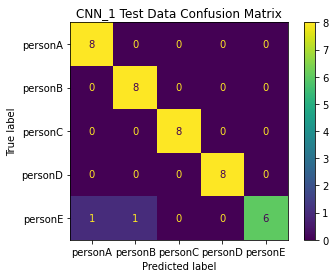

In [151]:
conf_mat = ConfusionMatrixDisplay.from_predictions(tst_labels, cnn1_preds, display_labels=train_data.class_names)
conf_mat.ax_.set_title("CNN_1 Test Data Confusion Matrix")
plt.show()

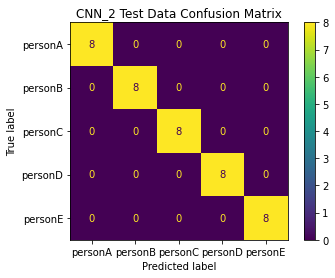

In [153]:
conf_mat = ConfusionMatrixDisplay.from_predictions(tst_labels, cnn2_preds, display_labels=train_data.class_names)
conf_mat.ax_.set_title("CNN_2 Test Data Confusion Matrix")
plt.show()

# Choosen Model test set visualization

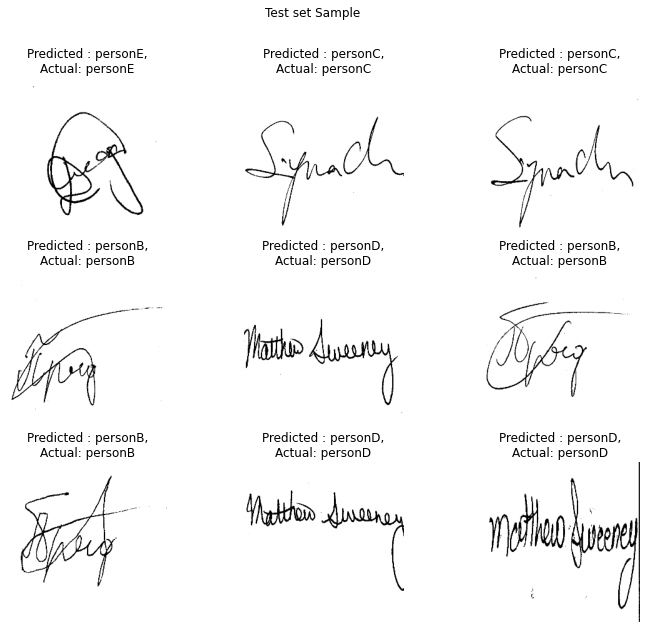

In [166]:
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Test set Sample")
for images, labels in test_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().squeeze().astype("uint8"), cmap='gray')

    pred = cnn2.predict(np.expand_dims(images[i], axis=0), verbose=0).argmax(axis=1)[0]
    pred_class = train_data.class_names[pred]
    plt.title(f"Predicted : {pred_class},\nActual: {train_data.class_names[labels[i]]}")
    plt.axis("off")